In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, pi, sqrt
from scipy.integrate import odeint
import matplotlib.patches as patches

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# 2

In [2]:
import time
from matplotlib.patches import Ellipse
from matplotlib.patches import Circle

In [3]:
M_space = np.linspace(0, 2*pi, 100)
a = 0.5
e = 0.2
a2 = 1.0
e2 =0.1
b = a * ((1 - (e**2))**(0.5))
b2 = a2 * ((1 - (e**2))**(0.5))

#x_prime = -a*e*cos(M_space)
#y_prime = 2*a*e*sin(M_space)

<IPython.core.display.Javascript object>


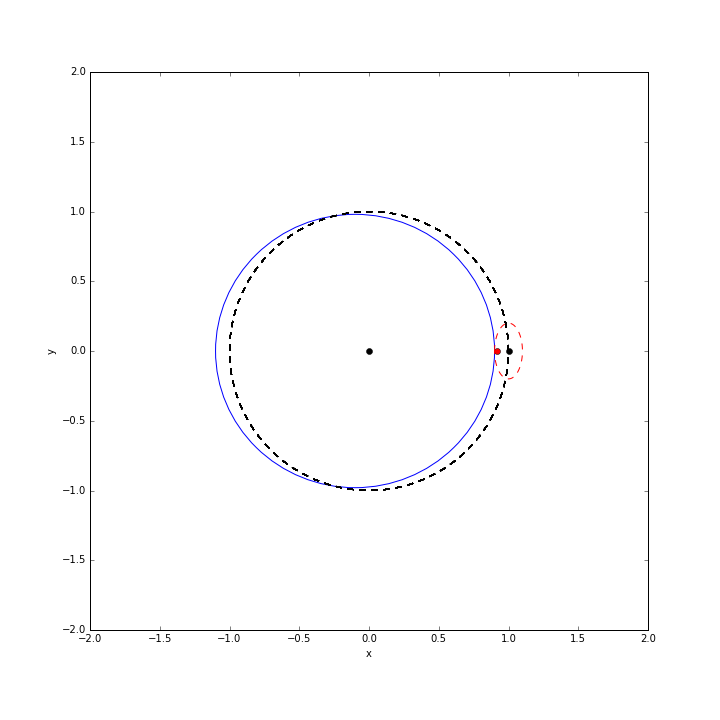

In [4]:
%matplotlib notebook
fig,ax = plt.subplots(1,1, figsize= (10,10))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.plot([0],[0],'ko')
plt.show()
first = True
for M_frame in M_space:
    f_frame = 2*e2*sin(M_frame) + M_frame
    r_frame = (a2*(1+e2**2))/(1+e2*cos(f_frame))
    if first:
        ax.plot(np.cos(M_frame), np.sin(M_frame), 'ko') #guiding center dot
        ax.plot(np.cos(M_space), np.sin(M_space), 'k--') #guiding circle
        ax.plot(np.cos(M_frame) -a*e*np.cos(M_frame), np.sin(M_frame) + 2*a*e*np.sin(M_frame), 'ro') # Planet
        ax.plot(np.cos(M_frame) -a*e*np.cos(M_space), np.sin(M_frame) + 2*a*e*np.sin(M_space) , 'r--') #Guiding Center ellipse 
        ell2 = Ellipse(xy = (0-a*e*np.cos(M_frame),0), width= (2.0*a2), height = (2.0*b2)) #Elliptical orbit of planet
        ell2.set_facecolor('none')
        ell2.set_edgecolor('blue')
        ax.add_artist(ell2) #circular orbit
        first = False
    else:
        ax.lines[1].set_xdata(np.cos(M_frame)) #guiding circle
        ax.lines[1].set_ydata(np.sin(M_frame))
        ax.lines[3].set_xdata(r_frame*np.cos(f_frame))#Planet
        ax.lines[3].set_ydata(r_frame*np.sin(f_frame))
        ax.lines[4].set_xdata(-a*e*np.cos(M_space)*np.cos(M_frame) - 2*a*e*np.sin(M_space)*np.sin(M_frame) + np.cos(M_frame))#GUiding Center ellipse
        ax.lines[4].set_ydata(-a*e*np.cos(M_space)*np.sin(M_frame) + 2*a*e*np.sin(M_space)*np.cos(M_frame) + np.sin(M_frame))
        ax.plot(np.cos(M_space), np.sin(M_space), 'k--') #guiding circle

    fig.canvas.draw()
    time.sleep(0.1)
